## 다이나믹 프로그래밍
+ 메모리 공간을 약간 더 사용하면서 연산 속도를 비약적으로 증가

In [ ]:
# 피보나치 수열을 재귀함수로
def fibo(x):
  if x == 1 or x == 2:
    return 1
  return fibo(x-1) + fibo(x-2)

print(fibo(5))

5


+ 위와 같은 소스코드는 O(2^N)이라는 시간 복잡도가 매우 큼
+ N = 30 이라면 약 10억 가량의 연산을 수행 해야함
+ 이러한 문제는 다이나믹 프로그래밍을 사용하면 효율적으로 해결 가능


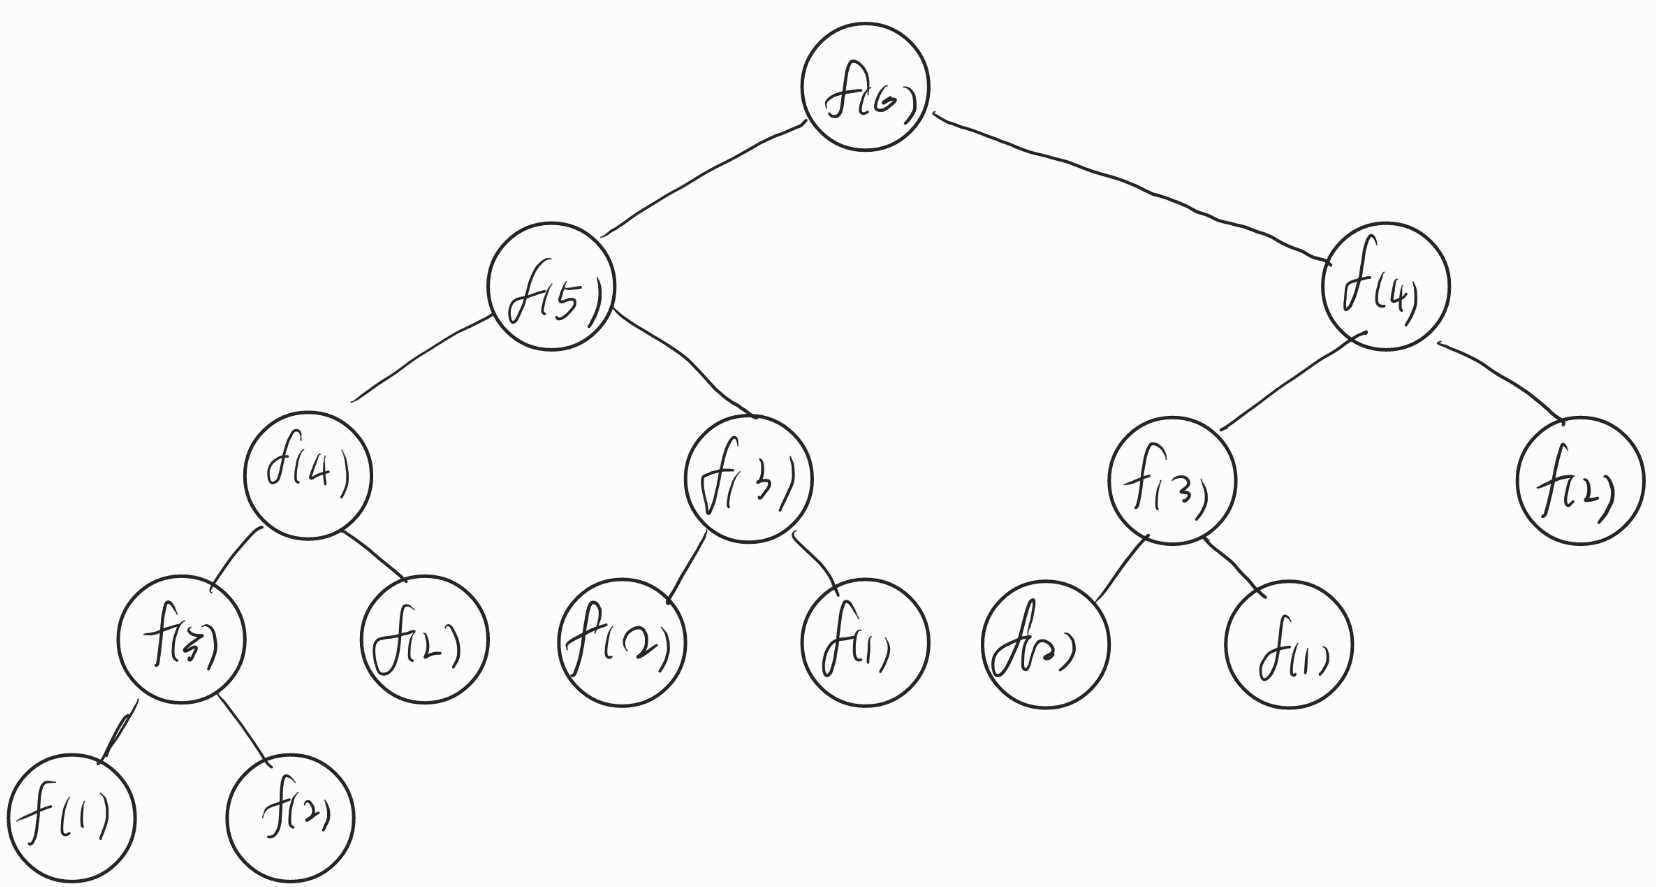

+ 하지만 항상 다이나믹 프로그래밍을 사용할 수는 없으며, 다음 조건을 만족할 때만 사용가능
1. 큰 문제를 작은 문제로 나눌 수 있다.
2. 작은 문제에서 구한 정답은 그것을 포함하는 큰 문제에서도 동일하다.
+ 피보나치 수열은 이러한 조건을 만족하는 대표 문제
+ 다이나믹 프로그래밍 구현의 한 방법으로 메모이제이션 기법 사용
+ 메모이제이션 : 한번 구한 결과를 메모리 공간에 메모해두고 같은 식으로 다시 호출하면 메모한 결과를 그대로 가져오는 기법(메모이제이션은 값을 저장하는 방법으로 ***캐싱*** 이라고도 한다


In [ ]:
# 한번 계산된 결과를 메모이제이션 하기 위한 리스트 초기화
d = [0] * 100

# 피보나치 함수를 재귀함수로 구현(탑다운 다이내믹 프로그래밍)
def fibo(x):
  # 종료 조건(1 or 2일 때 1 반환)
  if x == 1 or x == 2:
    return 1
  # 이미 계산한 적 있는 문제라면 그대로 반환
  if d[x] != 0:
    return d[x]
  # 아직 계산하지 않은 문제라면 점화식에 따라서 피보나치 결과 반환
  d[x] = fibo(x - 1) + fibo(x - 2)
  return d[x]

print(fibo(99))

218922995834555169026


메모이제이션으로는 빨간 영역만 사용
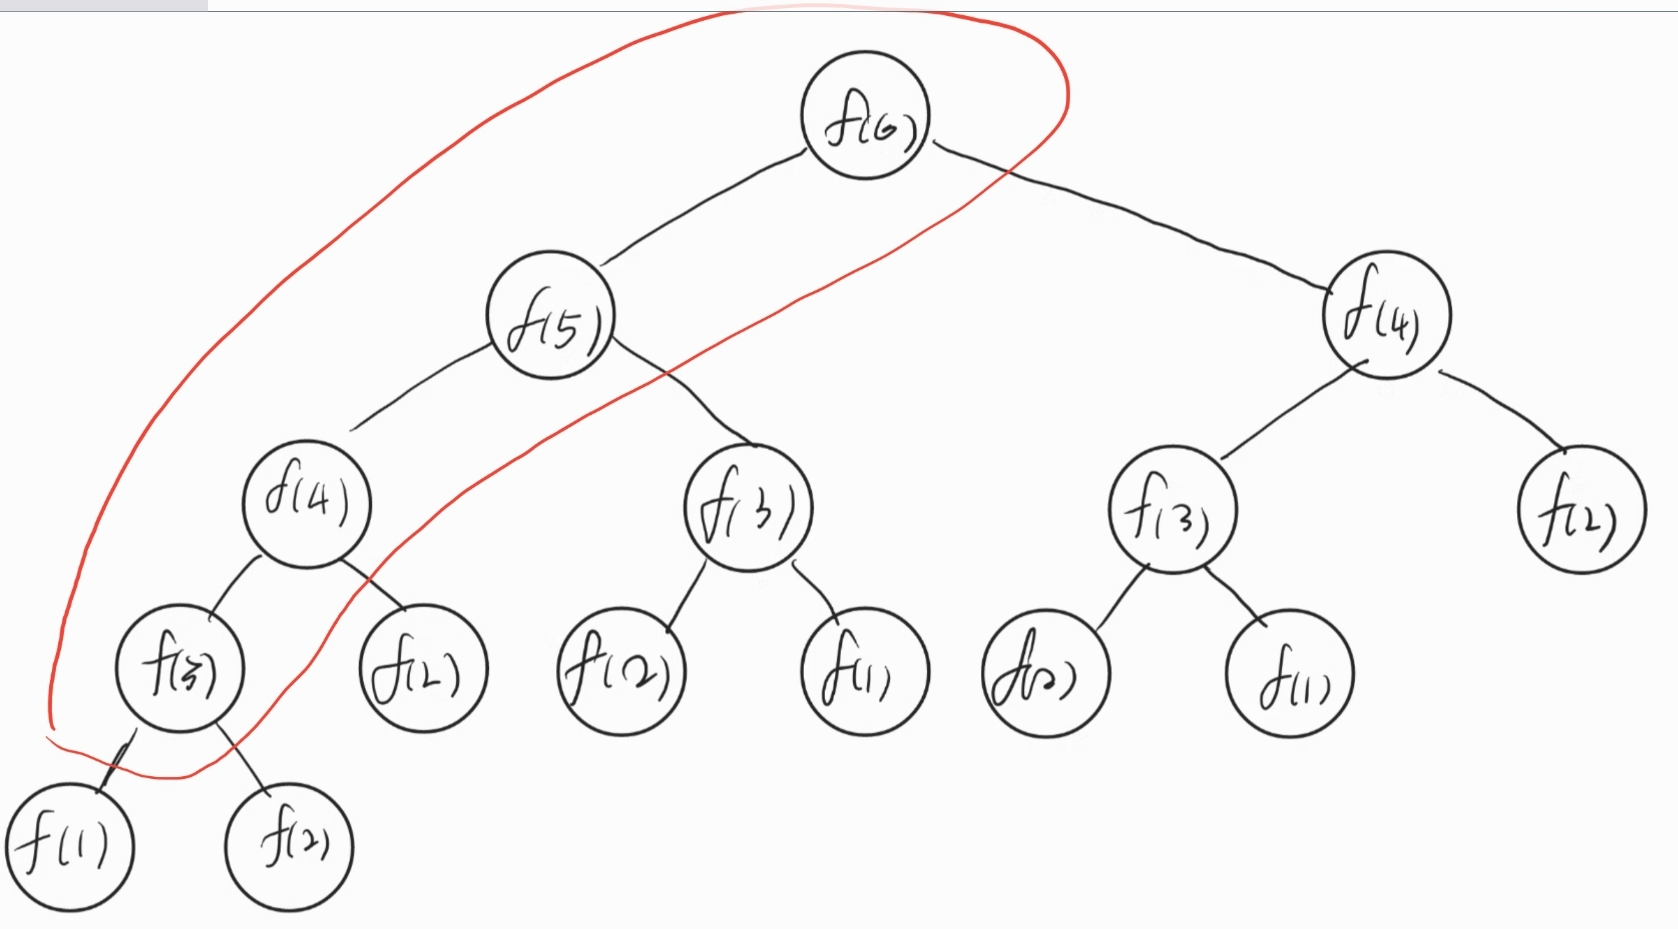

시간복잡도 O(N)

In [ ]:
# 호출되는 함수확인
d = [0] * 100

def pibo(x):
  print('f(' + str(x) + ')', end=' ')
  # 종료 조건(1 or 2일 때 1 반환)
  if x == 1 or x == 2:
    return 1
  # 이미 계산한 적 있는 문제라면 그대로 반환
  if d[x] != 0:
    return d[x]
  # 아직 계산하지 않은 문제라면 점화식에 따라서 피보나치 결과 반환
  d[x] = pibo(x - 1) + pibo(x - 2)
  return d[x]

print(pibo(6))

f(6) f(5) f(4) f(3) f(2) f(1) f(2) f(3) f(4) 8


+ 메모이제이션은 큰 문제를 해결하기 위해 작은 문제를 호출한다고 하여 탑다운 방식
+ 단순히 반복문을 이용하여 소스코드를 작성하는 경우 작은 문제부터 차근차근 답을 도출한다고 하여 바텀업 방식

In [ ]:
# 반복
d = [0] * 100 # 계산된 결과를 저장하기 위한 DP 테이블 초기화

# 첫번째, 두번째 값 1
d[1] = 1
d[2] = 1
n = 99

for i in range(3, n + 1):
  d[i] = d[i - 2] + d[i - 1]

print(d[n])

218922995834555169026


## 1로 만들기
+ 점화식을 생각


+ ai = i를 1로 만들기 위한 최소 연산 횟수

In [ ]:
# 정수 x 입력받기
x = int(input())

d = [0] * 30001

# 다이나믹 프로그래밍(바텀업)
for i in range(2, x + 1):
  # 현재의 수에서 1을 빼는 경우
  d[i] = d[i - 1] + 1 # 횟수를 구해야하기 때문에 +1 을 해줌
  # 현재의 수가 2로 나누어 떨어지는 경우
  if i % 2 == 0:
    d[i] = min(d[i], d[i // 2] + 1)
    # 현재의 수가 3로 나누어 떨어지는 경우
  if i % 3 == 0:
    d[i] = min(d[i], d[i // 3] + 1)
    # 현재의 수가 5로 나누어 떨어지는 경우
  if i % 5 == 0:
    d[i] = min(d[i], d[i // 5] + 1)

print(d[x])

26
3


In [ ]:
for i in range(2, 26 + 1):
  print(i, end=" ")

2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 

## 개미 전사

+ ai = i번째 식량창고까지의 최적의 해(얻을 수 있는 최댓값)
+ 점화식 ai = max(ai-1, ai-2 + k)

  하나 값의 값과 두번째 전값 + 현재의 값 중 큰 것들을 모든 상황에 대해서 계산


In [ ]:
n = int(input())

array = list(map(int, input().split()))

d = [0] * 100

d[0] = array[0]
d[1] = max(array[0], array[1])
for i in range(2, n):
  d[i] = max(d[i-1], d[i-2] + array[i])

print(d[n-1])


## 바닥공사

In [ ]:
n = int(input())

d = [0] * 1001

d[1] = 1
d[2] = 3
for i in range(3, n + 1):
  d[i] = (d[i - 1] + d[i-2]*2) % 796796

print(d[n])



3
5


## 효율적인 화폐구성
+ n가지 종류 화폐로 합계 m원이 되는 최소 화폐 개수 구하기

In [ ]:
n, m = map(int, input().split())

d = [10001] * (m + 1)

array = []

for i in range(n):
  array.append(int(input()))

d[0] = 0
for i in range(n):
  for j in range(array[i], m + 1):
    if d[j - array[i]] != 10001:
      d[j] = min(d[j], d[j - array[i]] + 1)

if d[m] == 10001:
  print(-1)
else:
  print(d[m])

3 7
